In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("C:/Users/PMYLS/Desktop/mobile_phone_pricing/notebook/data/mobile_pricing.csv")

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df["price_range"].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [7]:
df["price_range"].value_counts(normalize=True) * 100

price_range
1    25.0
2    25.0
3    25.0
0    25.0
Name: proportion, dtype: float64

Text(0, 0.5, 'Number of phones')

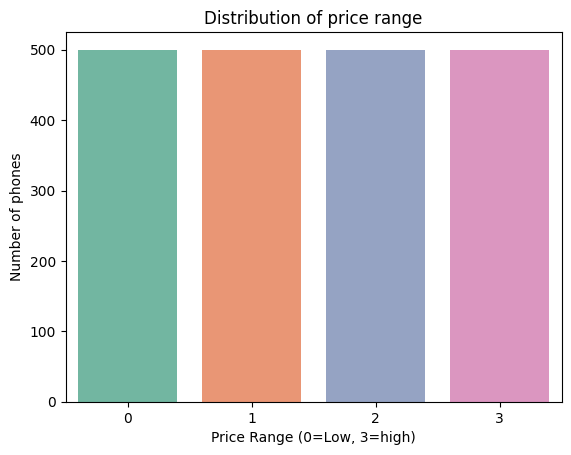

In [8]:
sns.countplot(x="price_range",data=df,palette="Set2")
plt.title("Distribution of price range")
plt.xlabel("Price Range (0=Low, 3=high)")
plt.ylabel("Number of phones")


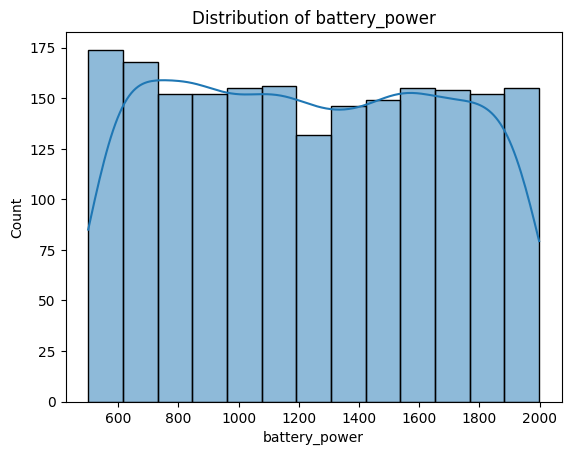

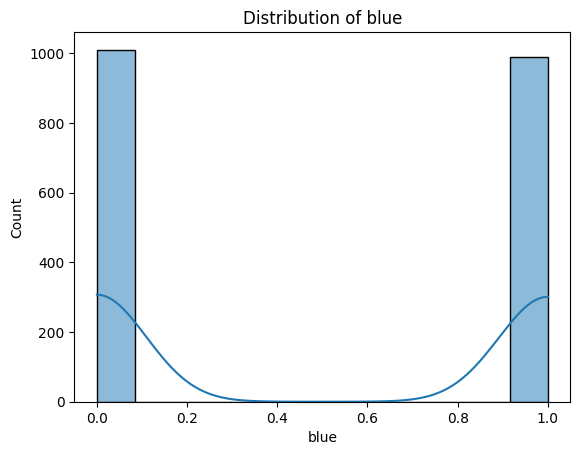

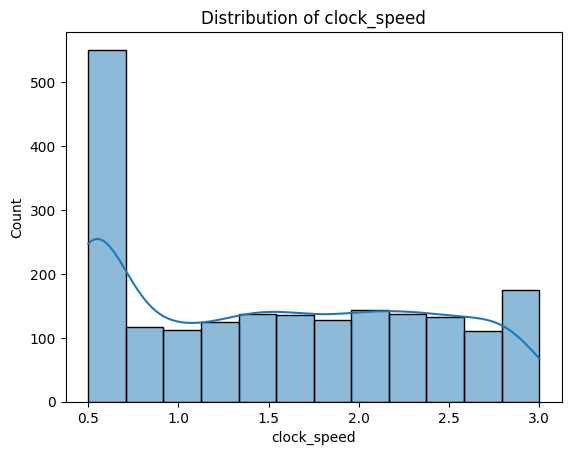

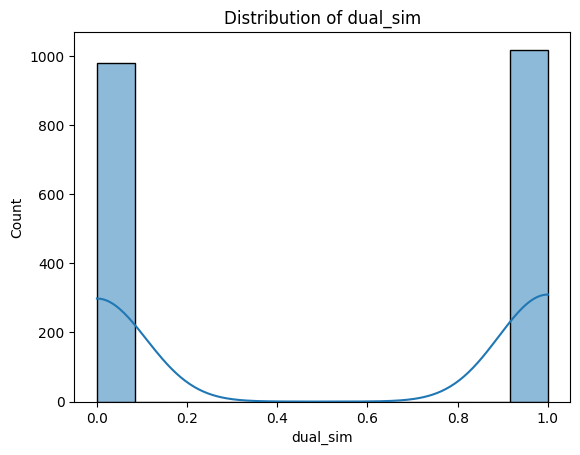

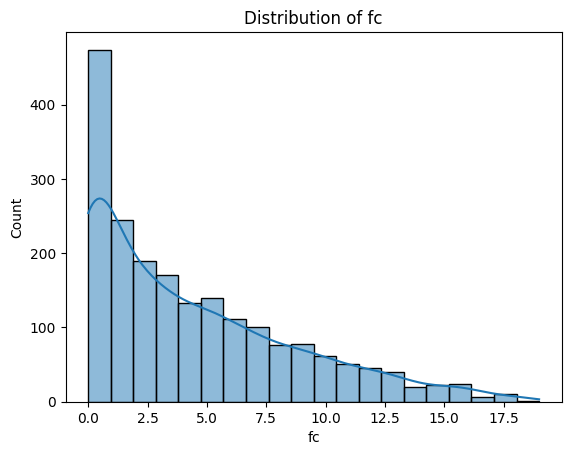

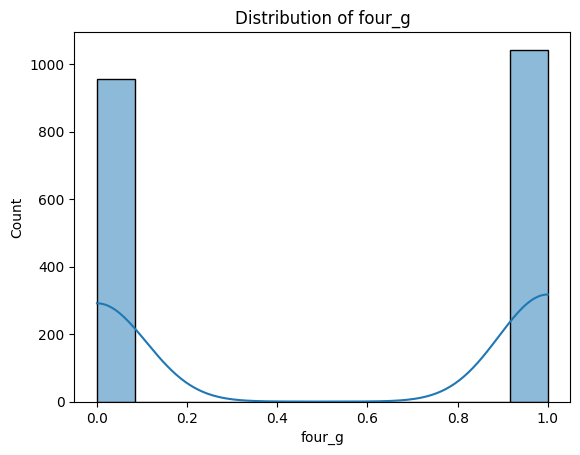

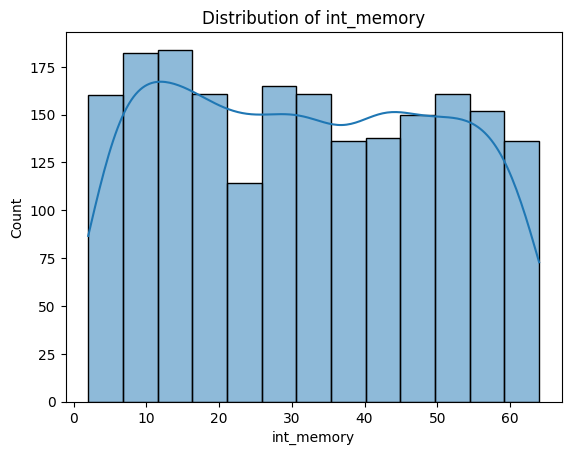

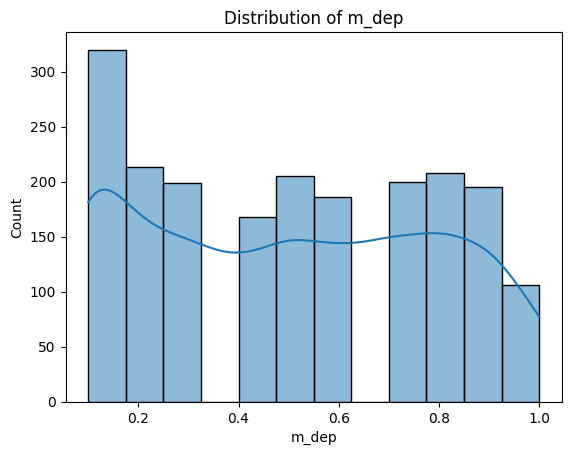

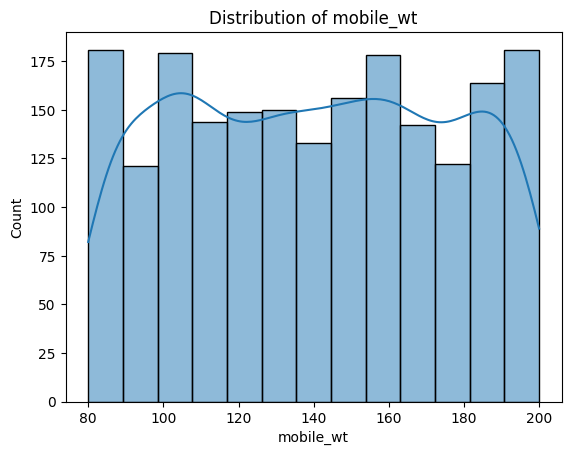

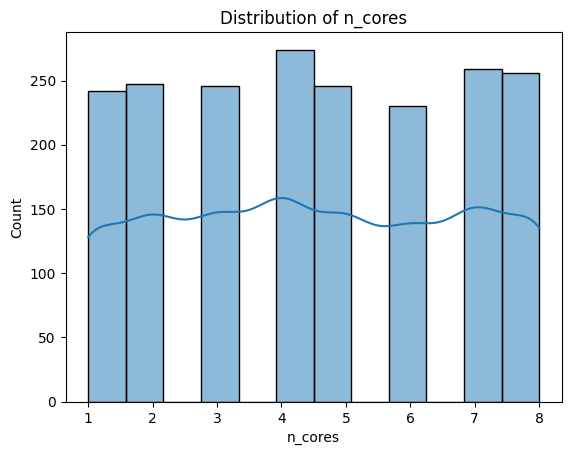

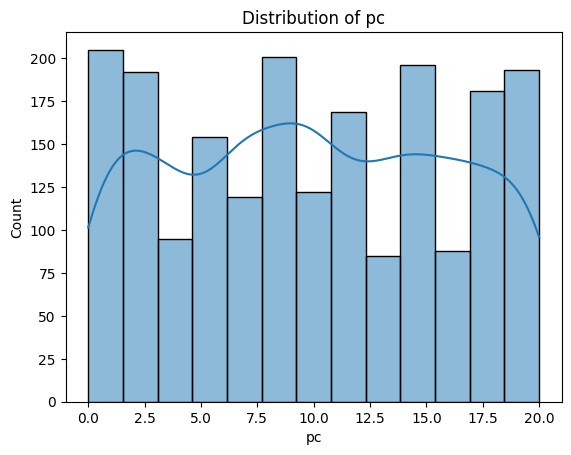

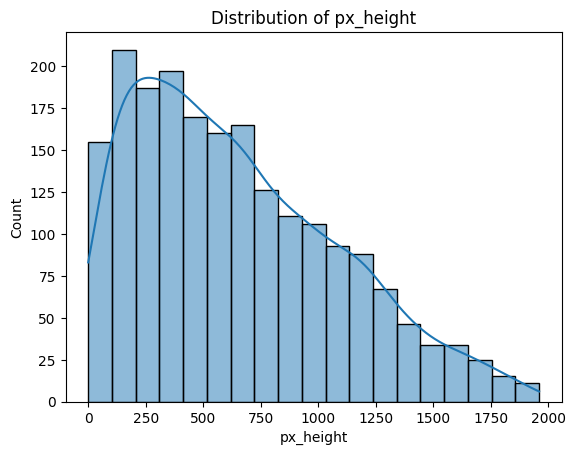

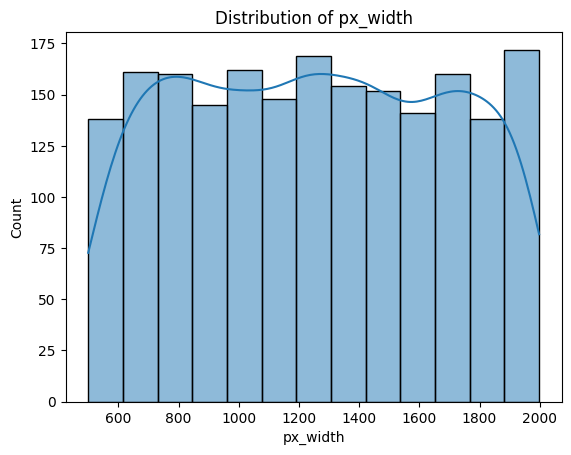

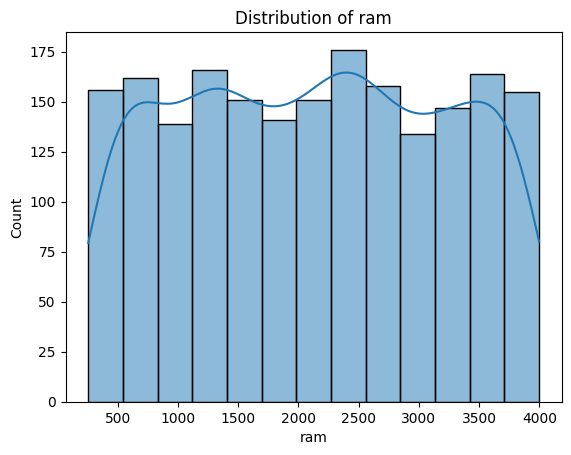

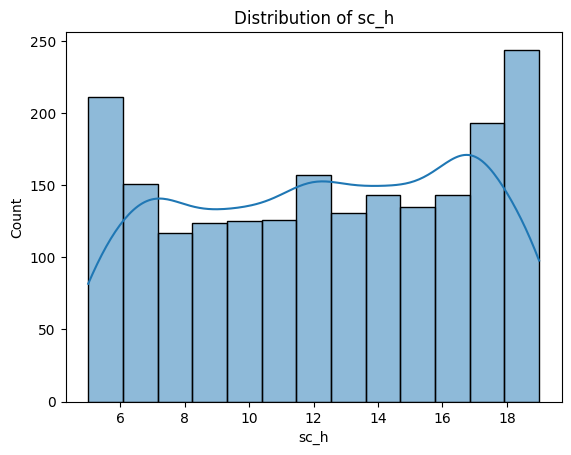

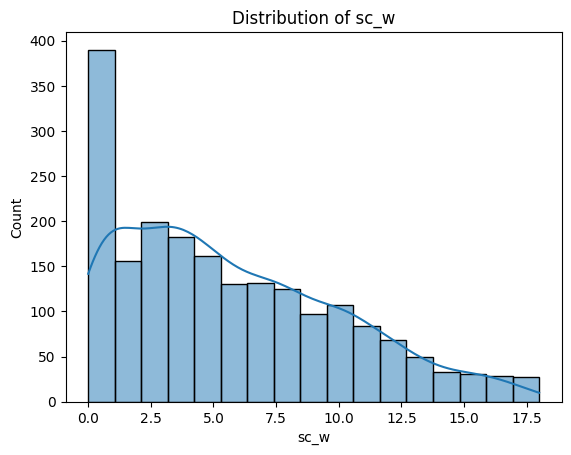

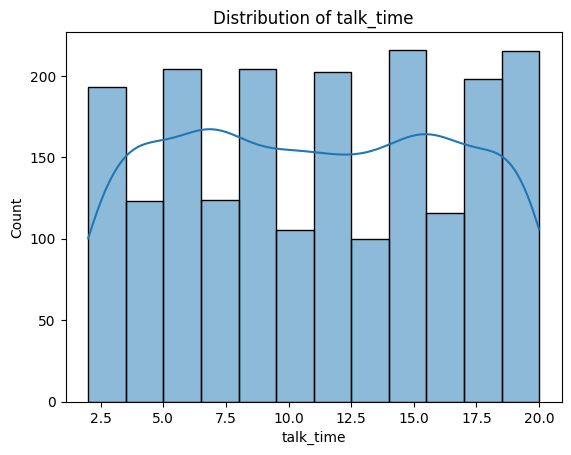

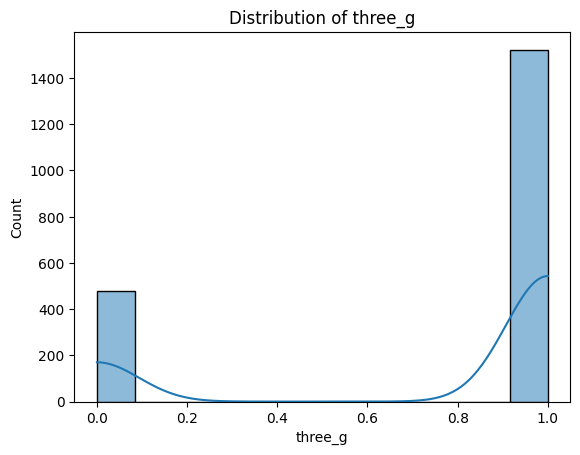

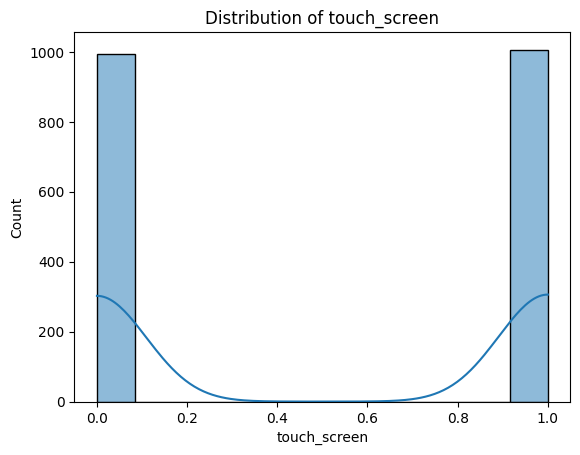

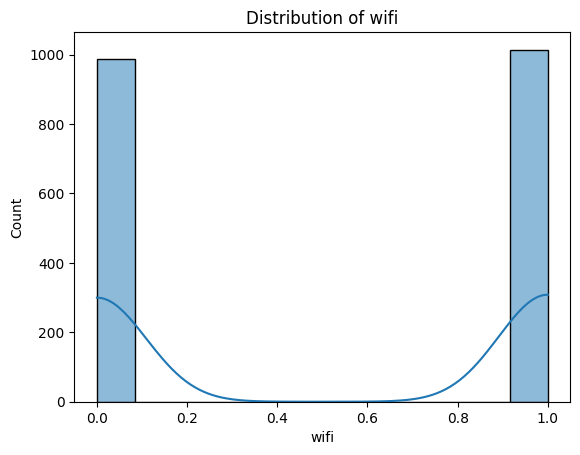

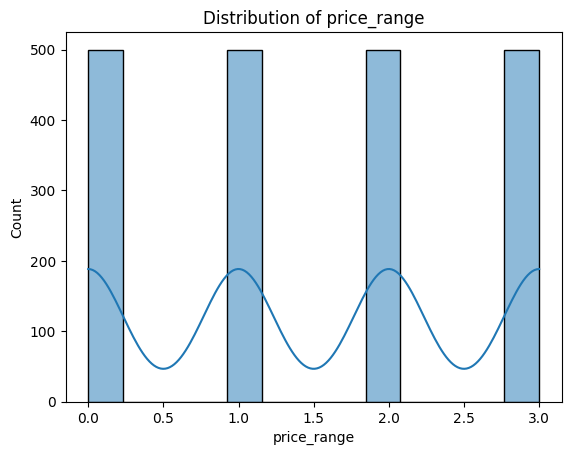

In [9]:
num_features=[feature for feature in df.columns if df[feature].dtype != "object"]
num_features
for feature in num_features:
    sns.histplot(df[feature],kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

In [10]:
corelation=df.corr()
print(corelation["price_range"].sort_values(ascending=False))


price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


In [11]:
# For high correlation between features
high_corr = corelation[(corelation > 0.8) & (corelation < 1)]
print(high_corr.dropna(how='all').dropna(axis=1, how='all'))


                  ram  price_range
ram               NaN     0.917046
price_range  0.917046          NaN


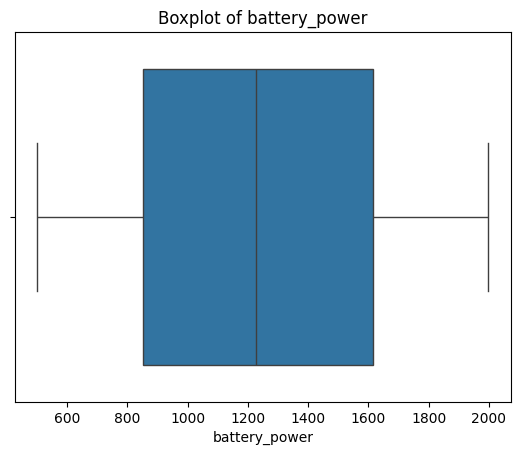

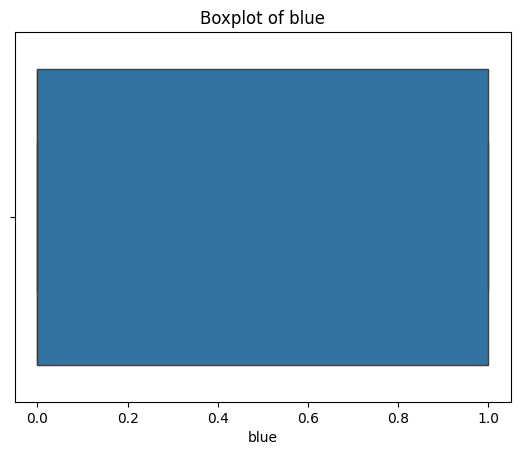

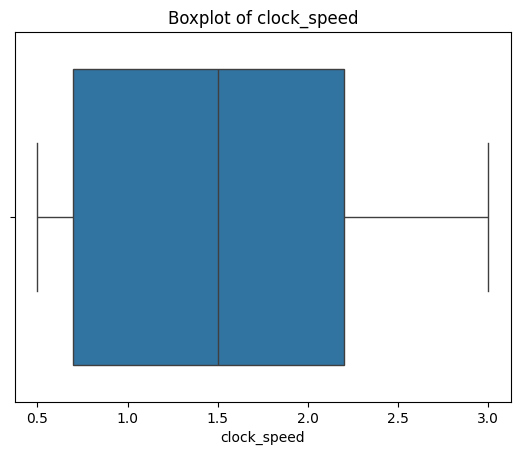

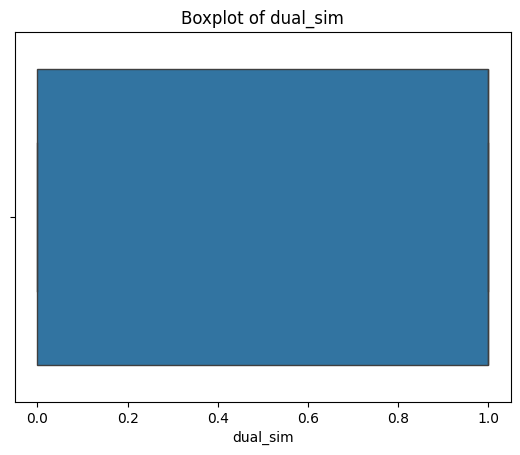

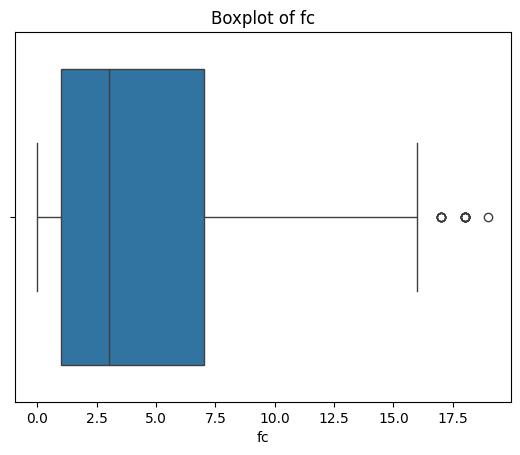

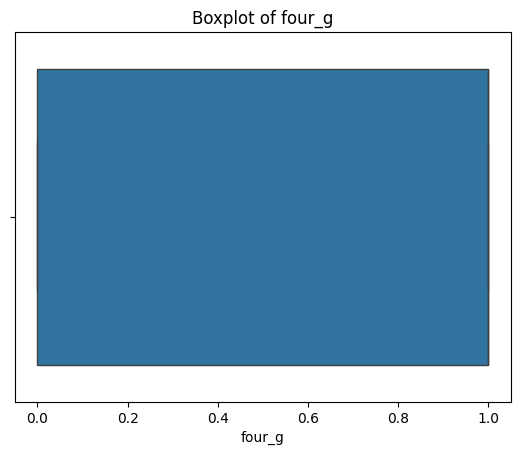

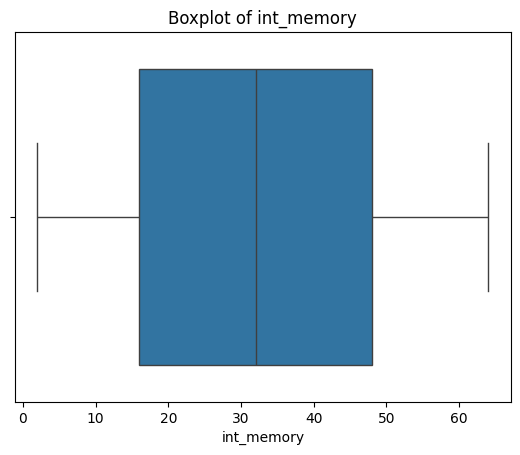

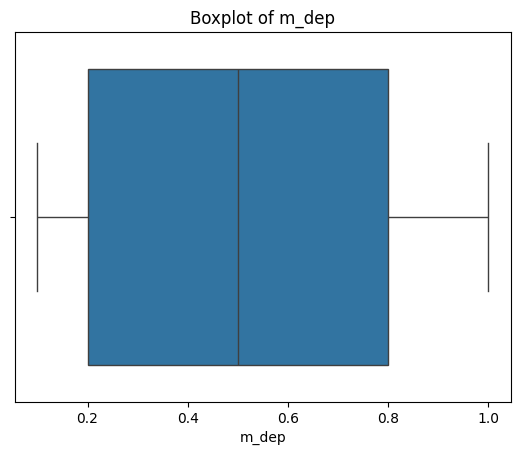

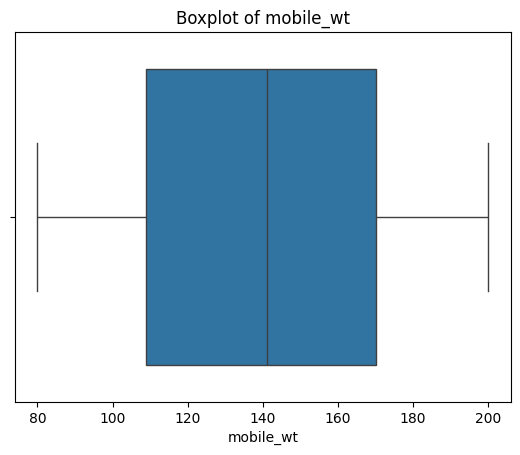

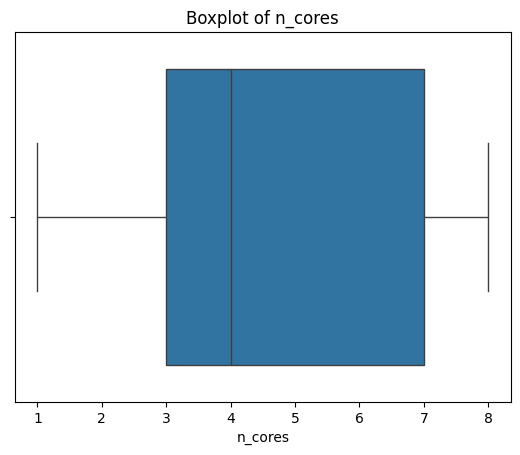

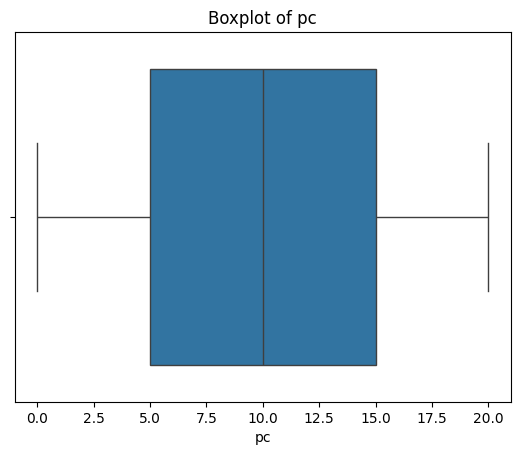

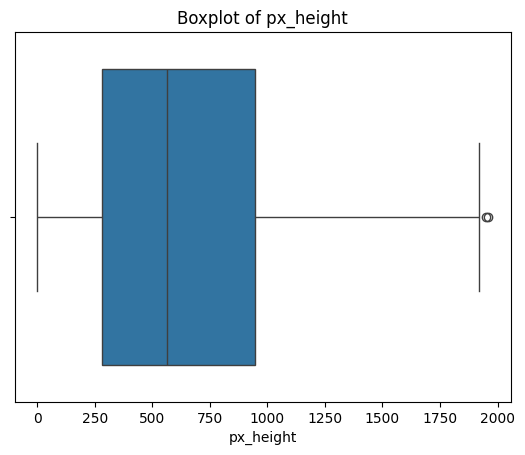

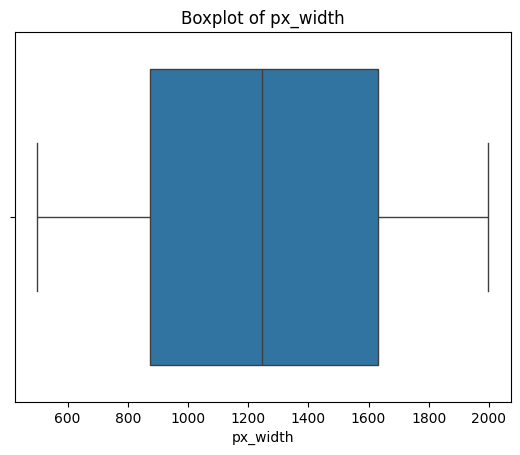

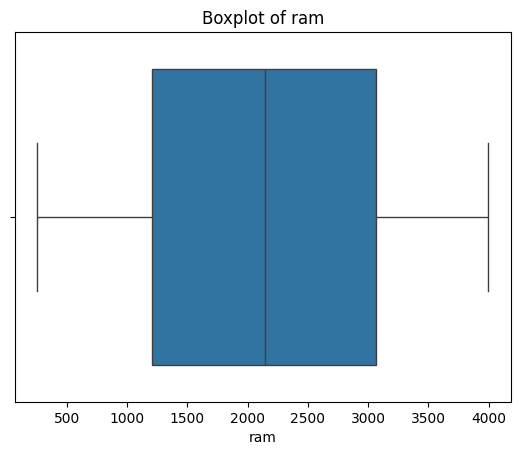

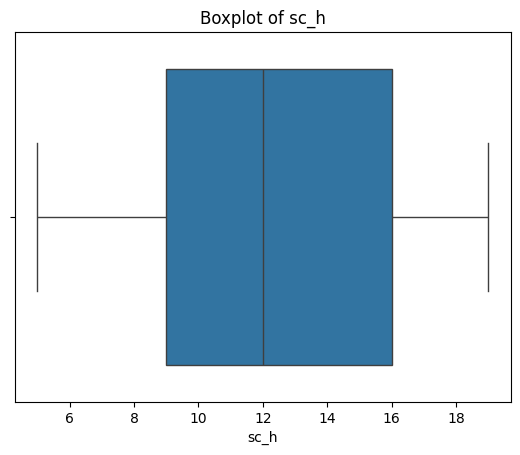

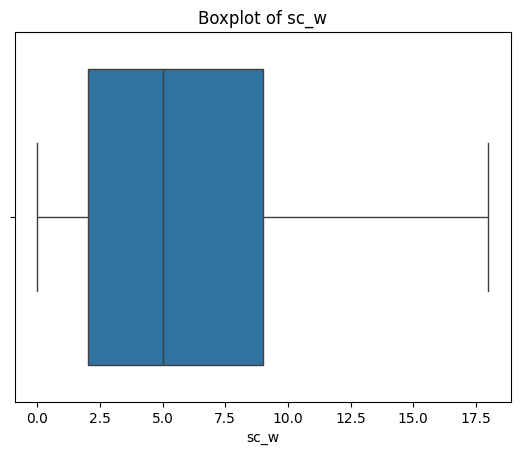

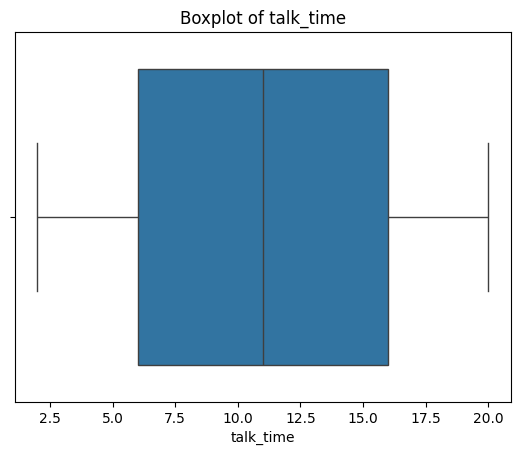

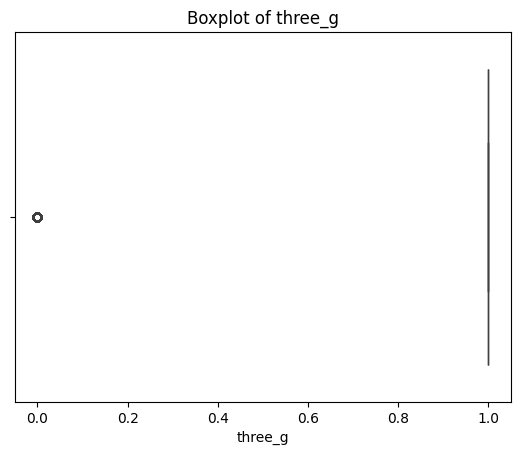

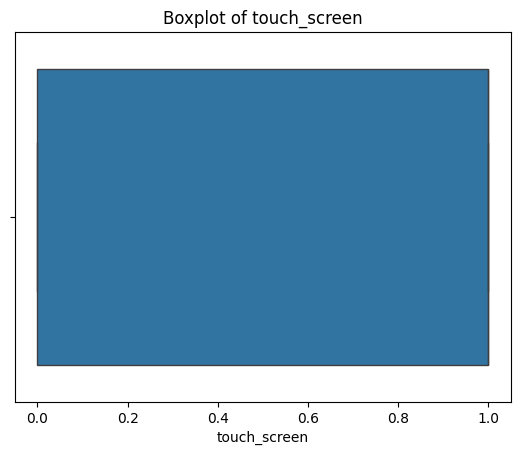

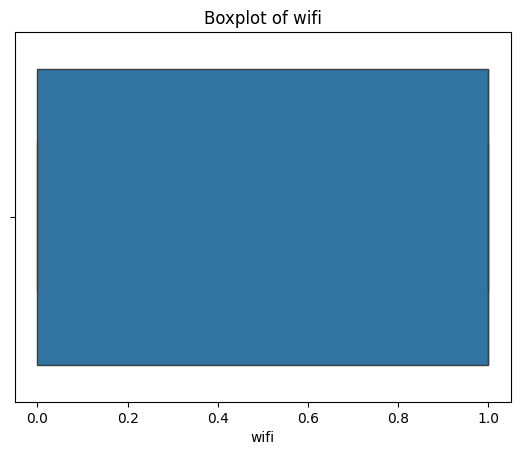

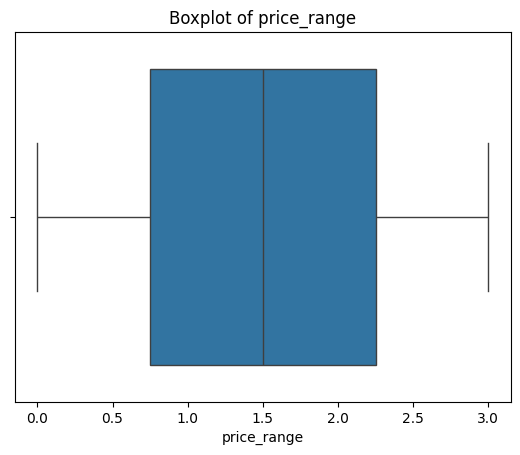

In [12]:
for feature in num_features:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [13]:
# Show outliers using IQR method for a feature
Q1 = df['ram'].quantile(0.25)
Q3 = df['ram'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['ram'] < Q1 - 1.5*IQR) | (df['ram'] > Q3 + 1.5*IQR)]
print(outliers.shape)


(0, 21)


In [14]:
cat_features=[feature for feature in df.columns if df[feature].dtypes=="object"]
cat_features

[]

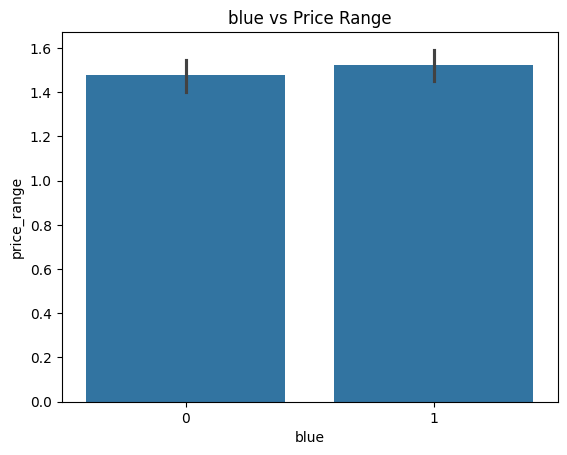

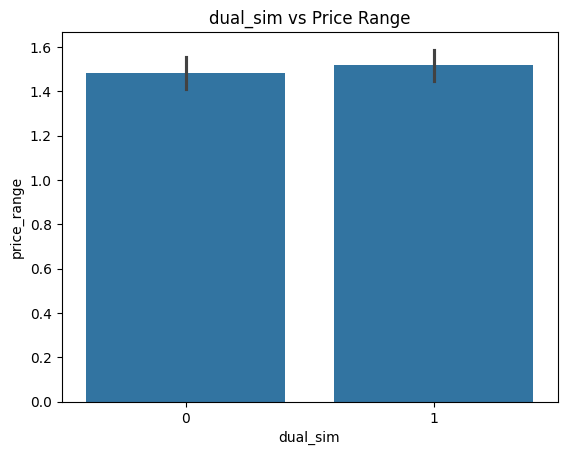

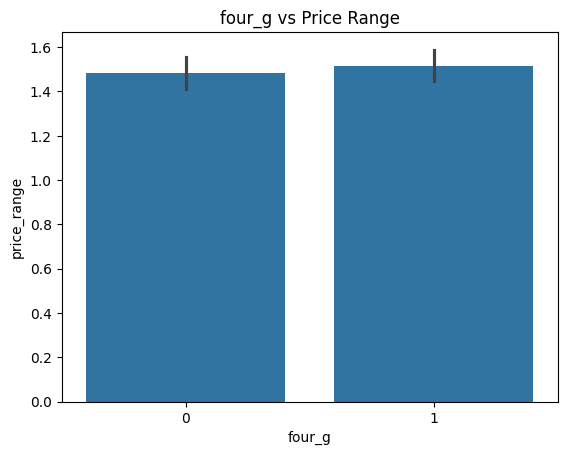

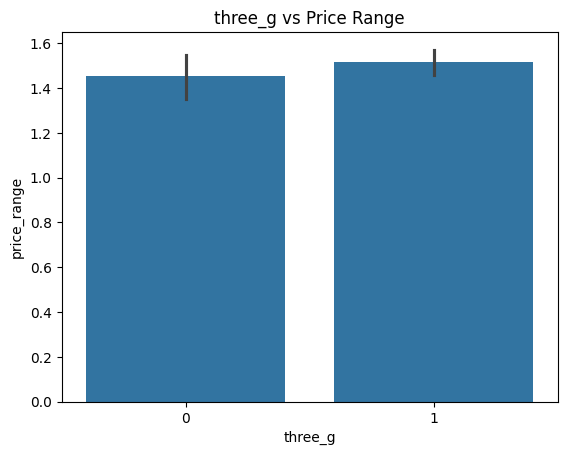

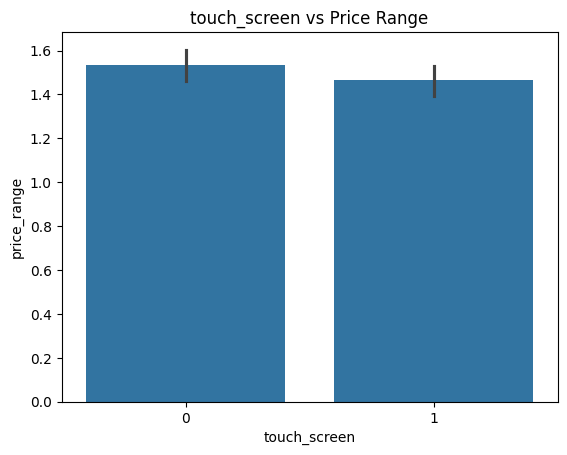

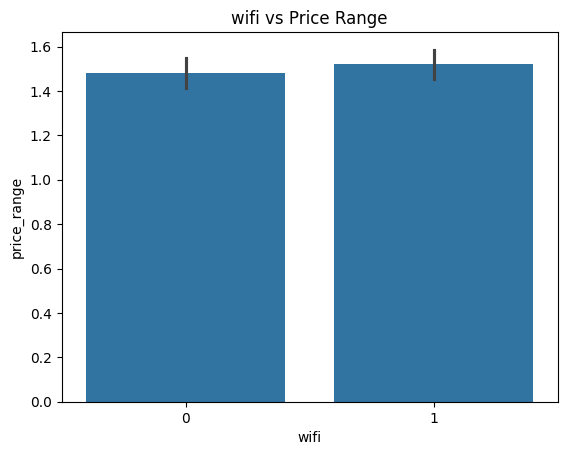

In [15]:
categorical = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for feature in categorical:
    sns.barplot(x=feature, y='price_range', data=df)
    plt.title(f'{feature} vs Price Range')
    plt.show()
